In [2]:
import os.path
import re
from itertools import chain
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

from data_access.data_loader import DataLoader

In [3]:
db_config = "C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\db_config.json"

def load(stock_name: str) -> DataFrame:
    _, tmp_df = DataLoader(Path("."), stock_name, db_config=db_config).get_section(0.8)
    tmp_df['close'] = (tmp_df['close']  / tmp_df['close'].max())
    tmp_df['close'] = tmp_df['close'] - tmp_df['close'].values[0]
    return tmp_df[['close']]

not_class = ["Apple", 'Deutsche Telekom']
good_class = ["Bayerische Motoren Werke AG", "Google", "Henkel vz."]
very_good_class = ["Deutsche Bank", "E.ON", "Infineon"]

def load_class_of_stocks(class_list: list[str]) -> list[DataFrame]:
    print(f"Loading: {class_list}")
    dfs = []
    for s in class_list:        
        dfs.append(load(s))
    return dfs


In [5]:
not_dfs = load_class_of_stocks(not_class)
good_dfs = load_class_of_stocks(good_class)
very_good_dfs = load_class_of_stocks(very_good_class)

Loading: ['Apple', 'Deutsche Telekom']
Loading: ['Bayerische Motoren Werke AG', 'Google', 'Henkel vz.']
Loading: ['Deutsche Bank', 'E.ON', 'Infineon']


--------------------------------------------------------------------------------
Not Class
--------------------------------------------------------------------------------


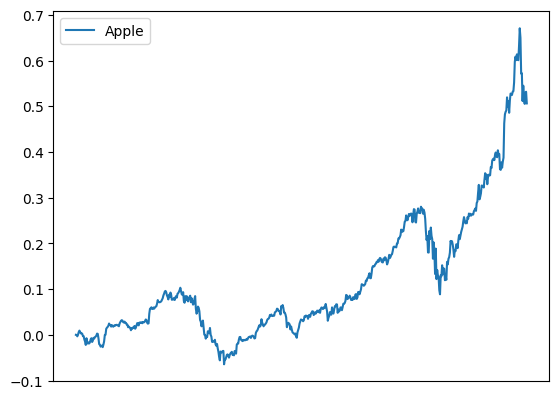

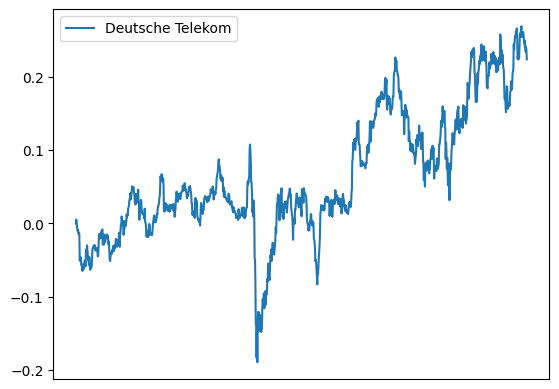

--------------------------------------------------------------------------------
Good Class
--------------------------------------------------------------------------------


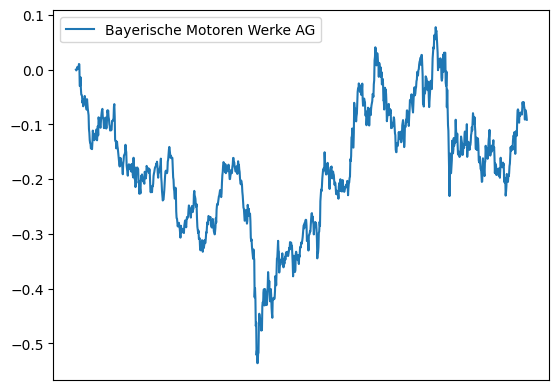

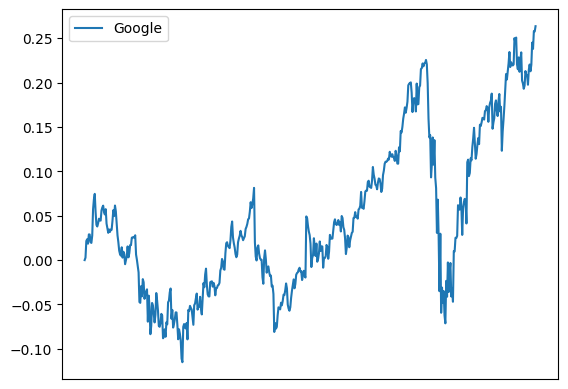

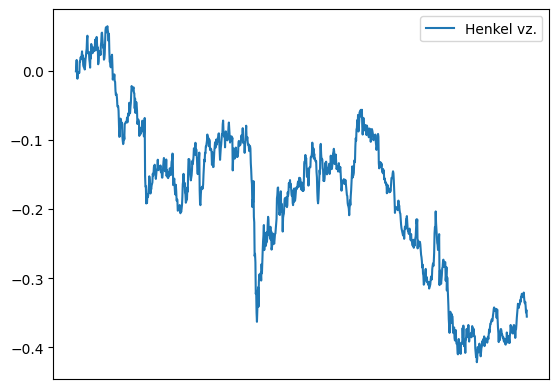

--------------------------------------------------------------------------------
Very Good Class
--------------------------------------------------------------------------------


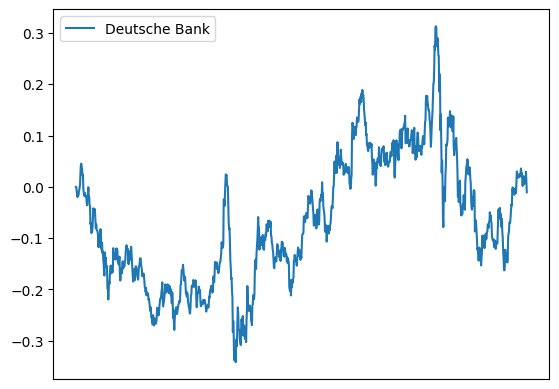

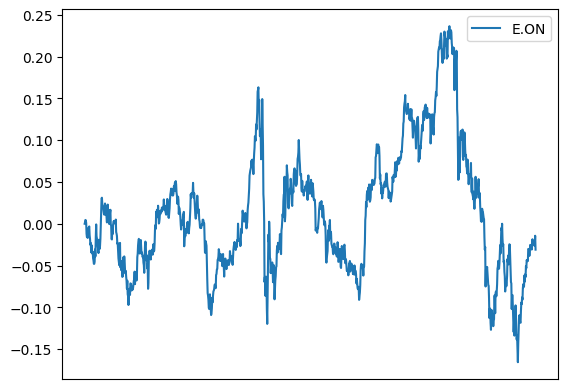

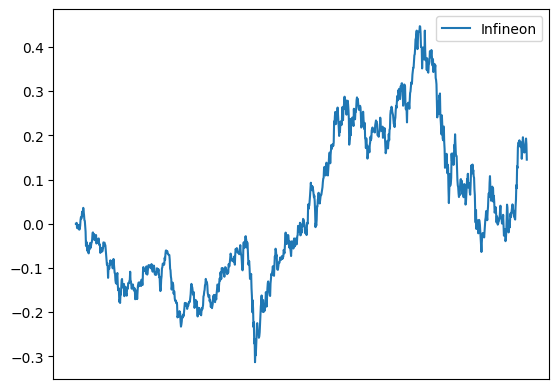

In [6]:

def plot_stock(name: str, df: DataFrame):
    value = 'close'
    plt.plot(df.index, df[value], label=name)
    plt.xticks([])
    plt.legend()
    plt.show()
    plt.close()

print("-"*80)
print("Not Class")
print("-"*80)
for i in range(len(not_dfs)):
    plot_stock(not_class[i], not_dfs[i])

print("-"*80)
print("Good Class")
print("-"*80)
for i in range(len(good_dfs)):
    plot_stock(good_class[i], good_dfs[i])

print("-"*80)
print("Very Good Class")
print("-"*80)
for i in range(len(very_good_dfs)):
    plot_stock(very_good_class[i], very_good_dfs[i])

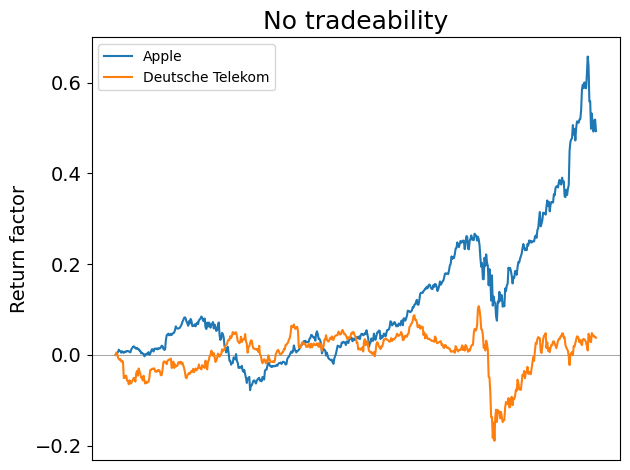

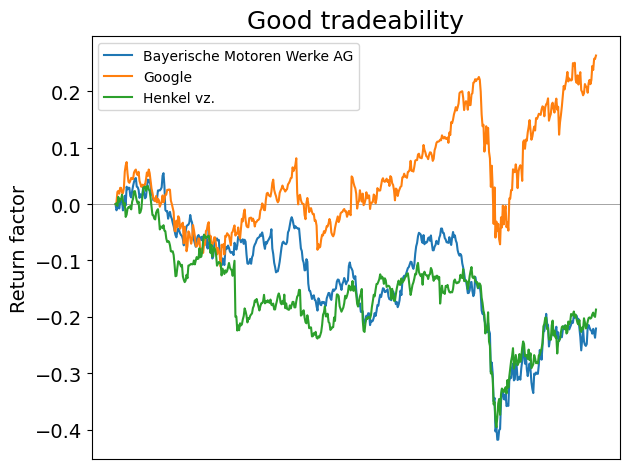

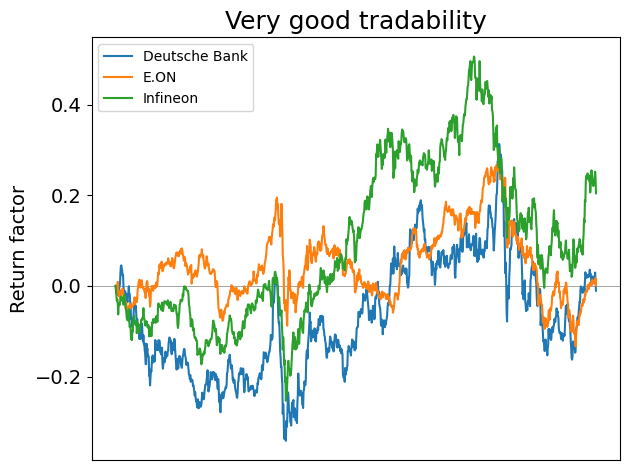

In [10]:
target_folder = Path("C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\exploration\\graphscripts\\graphs\\property_checks")

def merge_on_date(dfs: list[DataFrame], names: list[str]) -> DataFrame:
    acc_df = dfs[0]
    for i in range(len(dfs)):
        if i > 0:
            acc_df = acc_df.merge(dfs[i], on='date')
    acc_df = acc_df.apply(lambda x: x - x.iloc[0])    
    acc_df.columns = names
    return acc_df


def plot_stock(df: DataFrame, group_name: str, result_name: str):
    for c in df.columns:
        plt.plot(df.index, df[c], label=c)
    plt.xticks([])
    plt.axhline(0, color='gray', linestyle='-', linewidth=0.5, zorder=-1)
    plt.legend()
    plt.title(group_name, fontsize=18)
    plt.ylabel("Return factor", fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(target_folder.joinpath(result_name))
    plt.show()
    plt.close()

plot_stock(merge_on_date(not_dfs, not_class), "No tradeability", "NoTradability.png")
plot_stock(merge_on_date(good_dfs, good_class), "Good tradeability", "GoodTradability.png")
plot_stock(merge_on_date(very_good_dfs, very_good_class), "Very good tradability", "VeryGoodTradability.png")